In [2]:
# Packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from numpy.linalg import svd

Number of columns: 1200
Number of rows: 1600


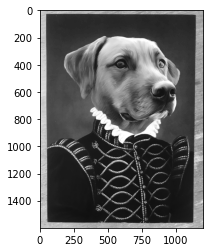

In [9]:
# importing matplotlib modules
from matplotlib.image import imread
import matplotlib.pyplot as plt
  
# Read Images
image_path = 'images/bellie.jpg'
img = imread(image_path)
  
# Output Images
plt.imshow(img)
X = np.asarray(img).mean(axis=2)

columns = X.shape[1]
rows = X.shape[0]
print("Number of columns: {}".format(X.shape[1]))
print("Number of rows: {}".format(X.shape[0]))

print("Dimension nullspace X: {}".format())

#
plt.imshow(X, cmap='gray')

 # Find best rank r approximation to original image
 
$- X =USV^T=\sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + ... + \sigma_{r} u_{r} v_{r}^T$

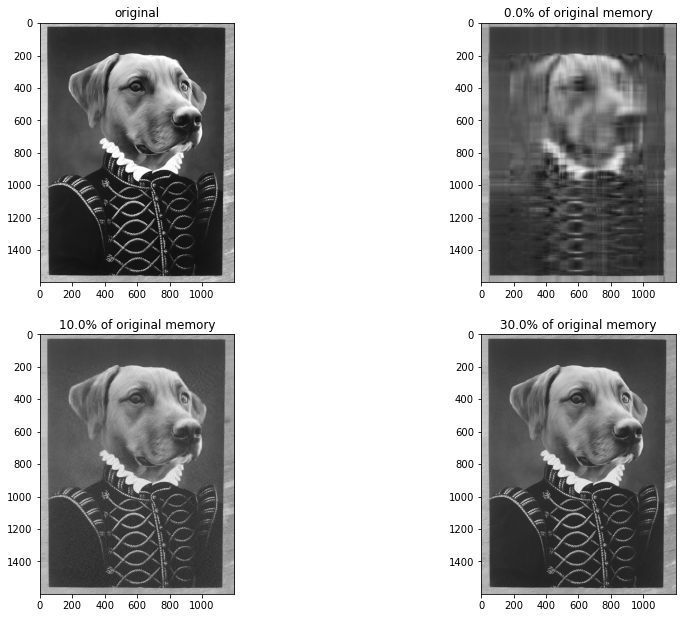

In [15]:
img = plt.imread(image_path)
X = np.asarray(img).mean(axis=2)

fig, ax = plt.subplots(2,2)
fig.set_size_inches(14.5, 10.5)

ax[0, 0].imshow(X, cmap='gray')
ax[0, 0].set_title("original")

# Do economy svd; leave out right nullspace
U, S, V = svd(X, full_matrices=False)

for i, rank in enumerate([10, 100, 200]):
    
    # First few columns from basis column space
    U_r = U[:, :rank]
    size_U_r = np.prod(U_r.shape)
    
    # Subblock of singular values
    S_r = np.diag(S)[:rank, :rank]
    
    # First few rows from basis row space
    V_r = V[:rank, :]
    size_V_r = np.prod(V_r.shape)
    
    # Total size reduced 
    X_r_size = size_U_r + size_V_r
    X_size = np.prod(X.shape)
    
    # Reconstruct X
    X_r = U_r @ S_r @ V_r
    
    ax[(i+1)//2, (i+1)%2].imshow(X_r, cmap='gray')
    ax[(i+1)//2, (i+1)%2].set_title("{}% of original memory".format(np.round(X_r_size/X_size,1)*100))
    

In [19]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)        # x-array
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
    interval=25, blit=True)
plt.show()

<IPython.core.display.Javascript object>